<a id="toc_section"></a>
## Table of Contents
* [Introduction](#top_section)
    - [Well... What do we have here?](#section1)
* [Exploring the Data](#section2)
    - [Categorical Features](#section3)
    - [Numerical Features](#section4)
    - [Missing Values](#section5)    
* [Building the Feature Engineering Machine](#section6)
    - [Data Merger](#section7)
    - [Family Assembler](#section8)
    - [Family Survival Detector](#section9)   
    - [Title Extractor](#section10)
    - [Title Encoder](#section11)
    - [Age Filler](#section12)
    - [Age Grouper](#section13)
    - [Fare Imputer](#section14)
    - [Fare Encoder](#section15)
    - [Scaler](#section16)
    - [Embarked Processor](#section17)
    - [Deck Finder](#section18)
    - [Gender Mapper](#section19)
    - [Pclass Sorter](#section20)
    - [Ticket Cleaner](#section21)
    - [Housekeeping](#section22)
    - [Feeding the Machine](#section23)
* [Double Check](#section24)
    - [Correlation Matrix](#section25)
* [Modelling](#section26)
    - [Model Selection](#section27)
    - [Cross-Validate Models](#section28)
    - [Model Results](#section29)
    - [ROC'S of the Models](#section30)
    - [Learning Curves of the Models](#section31)
* [Feature Selection](#section31.1)
    - [Feature Importances](#section32)
    - [Decision Trees](#section33)    
    - [Feature Selection by Recursive Feature Elimination](#section34)
    - [Dimension Reduction by Principal Component Analysis](#section35)
    - [Reduced Dimension Model Results with Cross-Validation](#sectioncv)
* [Plotting Decision Boundaries](#section36)
* [Plotting Decision Regions](#section37)
* [Submission & Some Last Words](#sectionlst)

<a id="Extract"></a>
# 1. Extract

<a id="top_section"></a>
# 2. Introduction



### My main objectives on this project are:

* Explorating and visualising the data, trying to get some insights about our dataset
* Getting data in better shape by feature engineering to help us in building better models
* Building and tuning couple regression models to get some stable results on predicting Titanic disaster outcome

### In this notebook we are going to try explore the data we have and going try answer questions like:

- What is the ditribution of Sale Price in the training data
- What are the categorical and continuous attributes of the data set?
- Which attributes are too focused on one attributes?

<a id="section1"></a>
# 3. Loading and Exploring the data


### [Back To Table of Contents](#toc_section)

In [250]:
## 3.1 Loading Libraries required and reading the data into Python

In [251]:
# Importing neccesary packages.

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

#

from scipy import interp
import math
from scipy.stats import norm
from scipy import stats

#

import warnings
warnings.filterwarnings('ignore') # Disabling warnimgs for clearer outputs
pd.options.display.max_columns = 100 # Pandas option to increase max number of columns to display
pd.options.display.max_rows = 100
plt.style.use('ggplot') # Setting default plot style


In [252]:
# Read train and test data from csv files for visualization
v_train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
v_test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')
idx = len(v_train)

## 3.2 Data size and structure

Ok we have two sets(train and test) data and in total 2219 observations 80 features. Our target is SalePrice column which is not present on the test set(duh!)... 

For the rest we gonna inspect them individually soon but  generally speaking they look mostly categorical data with some continuous values like YearBuilt and Fireplaces.


In [253]:
# Checking train and test sets
display(v_train.sample(3))
display(v_test.sample(3))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1189,1190,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,994,994,GasA,Gd,Y,SBrkr,1028,776,0,1804,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1999.0,Fin,2,442,TA,TA,Y,140,60,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000
722,723,20,RL,70.0,8120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,7,1970,1970,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,191,Unf,0,673,864,GasA,Ex,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1994.0,Unf,2,463,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,124500
987,988,20,RL,83.0,10159,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,450.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1646,Unf,0,284,1930,GasA,Ex,Y,SBrkr,1940,0,0,1940,1,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2010.0,Fin,3,606,TA,TA,Y,168,95,0,0,0,0,NaN,NaN,NaN,0,4,2010,New,Partial,395192


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1004,2465,50,RL,60.0,8850,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,768.0,768.0,GasA,Ex,Y,SBrkr,752,624,0,1376,0.0,0.0,1,0,3,1,Gd,7,Typ,0,NaN,Detchd,1977.0,Unf,2.0,576.0,TA,TA,P,0,54,144,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal
541,2002,20,RL,74.0,13253,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,RRAn,Norm,1Fam,1Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,128.0,Gd,TA,PConc,Ex,TA,No,GLQ,1096.0,Unf,0.0,482.0,1578.0,GasA,Gd,Y,SBrkr,1578,0,0,1578,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,Unf,3.0,642.0,TA,TA,Y,0,26,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
836,2297,60,RL,82.0,9709,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,120.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,778.0,Unf,0.0,140.0,918.0,GasA,Ex,Y,SBrkr,958,1142,0,2100,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Gd,BuiltIn,2007.0,Fin,3.0,786.0,TA,TA,Y,172,104,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,Partial


# 4 Eploring Important Attritubes

## 4.1 The response variables; SalePrice

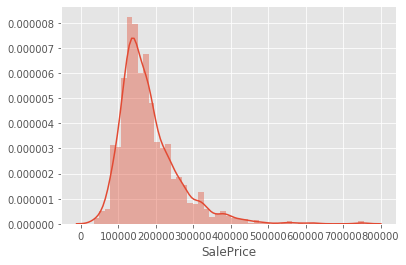

In [254]:
count = v_train['SalePrice'].value_counts(ascending=True)
sns.distplot(v_train['SalePrice']) 

In [255]:
display( v_train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


To get a general idea on the distribution of our targeted output.

As show on the statistics, the avearage distribution lie on around 160,000. The lower and upper quartile is at 130,000 and 214,000 respectively.

 (c&p)This was expected as few people can afford very expensive houses. 

In [256]:
# Merging visualization datasets.
v_train.drop('Id', axis=1, inplace=True);
v_test.drop('Id', axis=1, inplace=True);
v_merged = pd.concat([v_train, v_test])


<a id="section2"></a>
# Numeric Attritubes

We get a first glimpse to the correlation of all numeric attritubes with SalePrice the response variable.

In [257]:
# numeric_vars = v_train.apply()
# display(v_train.d_type)

numeric_vars = v_train.select_dtypes(include=['int64', 'float64'])
# numeric_vars = pd.concat([numeric_vars['SalePrice'], numeric_vars[:-1]])
# numeric_attritubes = numeric_vars.columns.values
numeric_attritubes = list(numeric_vars)
numeric_attritubes.insert(0, numeric_attritubes.pop(numeric_attritubes.index('SalePrice')))

# reorder column SalePrice to the front
numeric_vars = numeric_vars[numeric_attritubes]


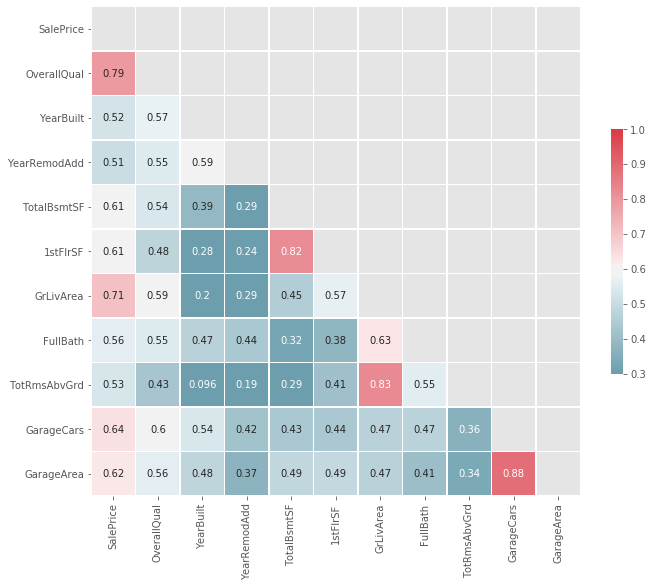

In [258]:
corr = numeric_vars.corr()
corr = corr.loc[corr['SalePrice']>0.5, corr['SalePrice']>0.5]
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=0.3, vmax=1, center=0.6, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From all the numeric values, ony 10 numeric attributes has a corrleation higher than 0.5 with the saleprice

As seen from the first column, OverallQual has the highest correlation with the SalePrice. The second is GrLiveArea

We can see that there is 2919 entries in total with 80 features

In [259]:
# Checking merged shape
display(v_merged.shape)

(2919, 80)

<a id="section3"></a>
## Categorical Features

- **MSSubClass**: Identifies the type of dwelling involved in the sale.
- **MSZoning**: Identifies the general zoning classification of the sale.
- **Street**: Type of road access to property
- **Alley**: Type of alley access to property
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits

## Numerical Features
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet


In [260]:
# Selecting categorical data for univariate analysis
cats = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2']


def plotFrequency(cats):
    #"A plot for visualize categorical data, showing both absolute and relative frequencies"
    fig, axes = plt.subplots(math.ceil(len(cats) / 2), 2, figsize=(20,12))
    axes = axes.flatten()

    for ax, cat in zip(axes, cats):
        if cat == 'Survived':
            total = float(len(v_train[cat]))
        else:
            total = float(len(v_merged[cat]))
        sns.countplot(v_merged[cat], palette='plasma', ax=ax)

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 10,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha="center")

        plt.ylabel('Count', fontsize=15, weight='bold')

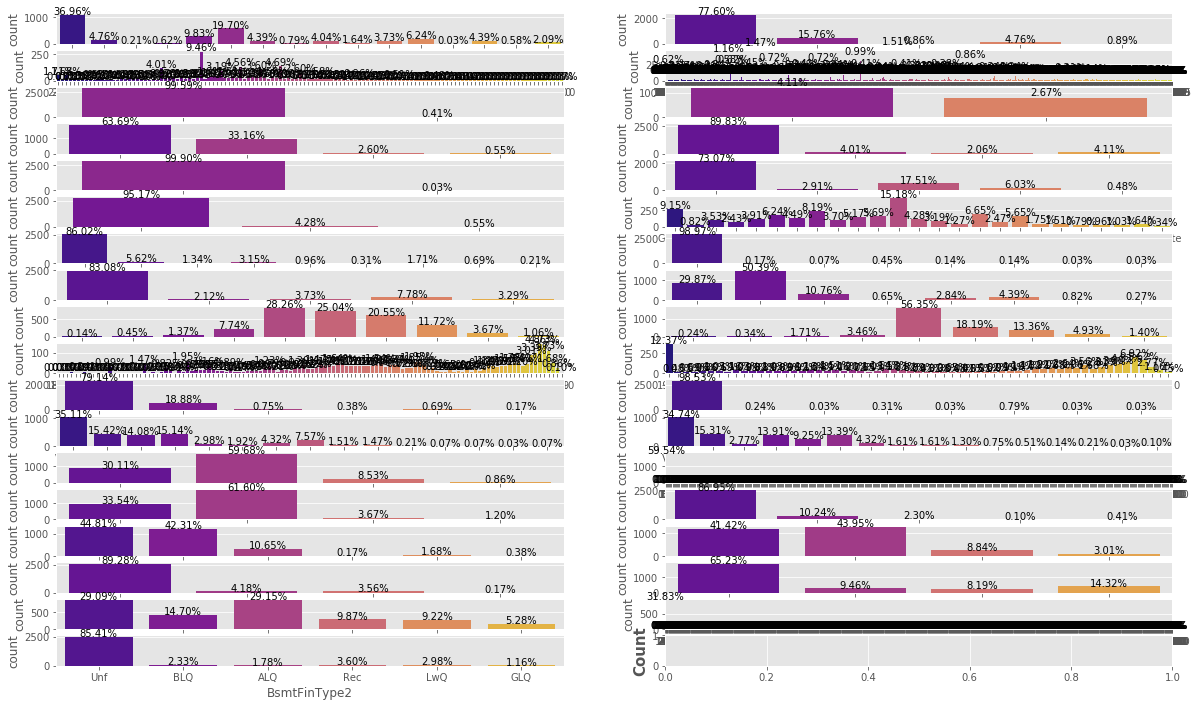

In [261]:
plotFrequency(cats)

<a id="section5"></a>
## 5. Missing Values

On both datasets Cabin feature is missing a lot, it looks this feature not useful for modelling but we might give it a chance with feature engineering later.

Again, Age feature has many missing values, we can impute them with some logical way to use later...

There are little number of missing values on Embarked and Fare, I think we can impute them without taking much risk.

### [Back To Table of Contents](#toc_section)

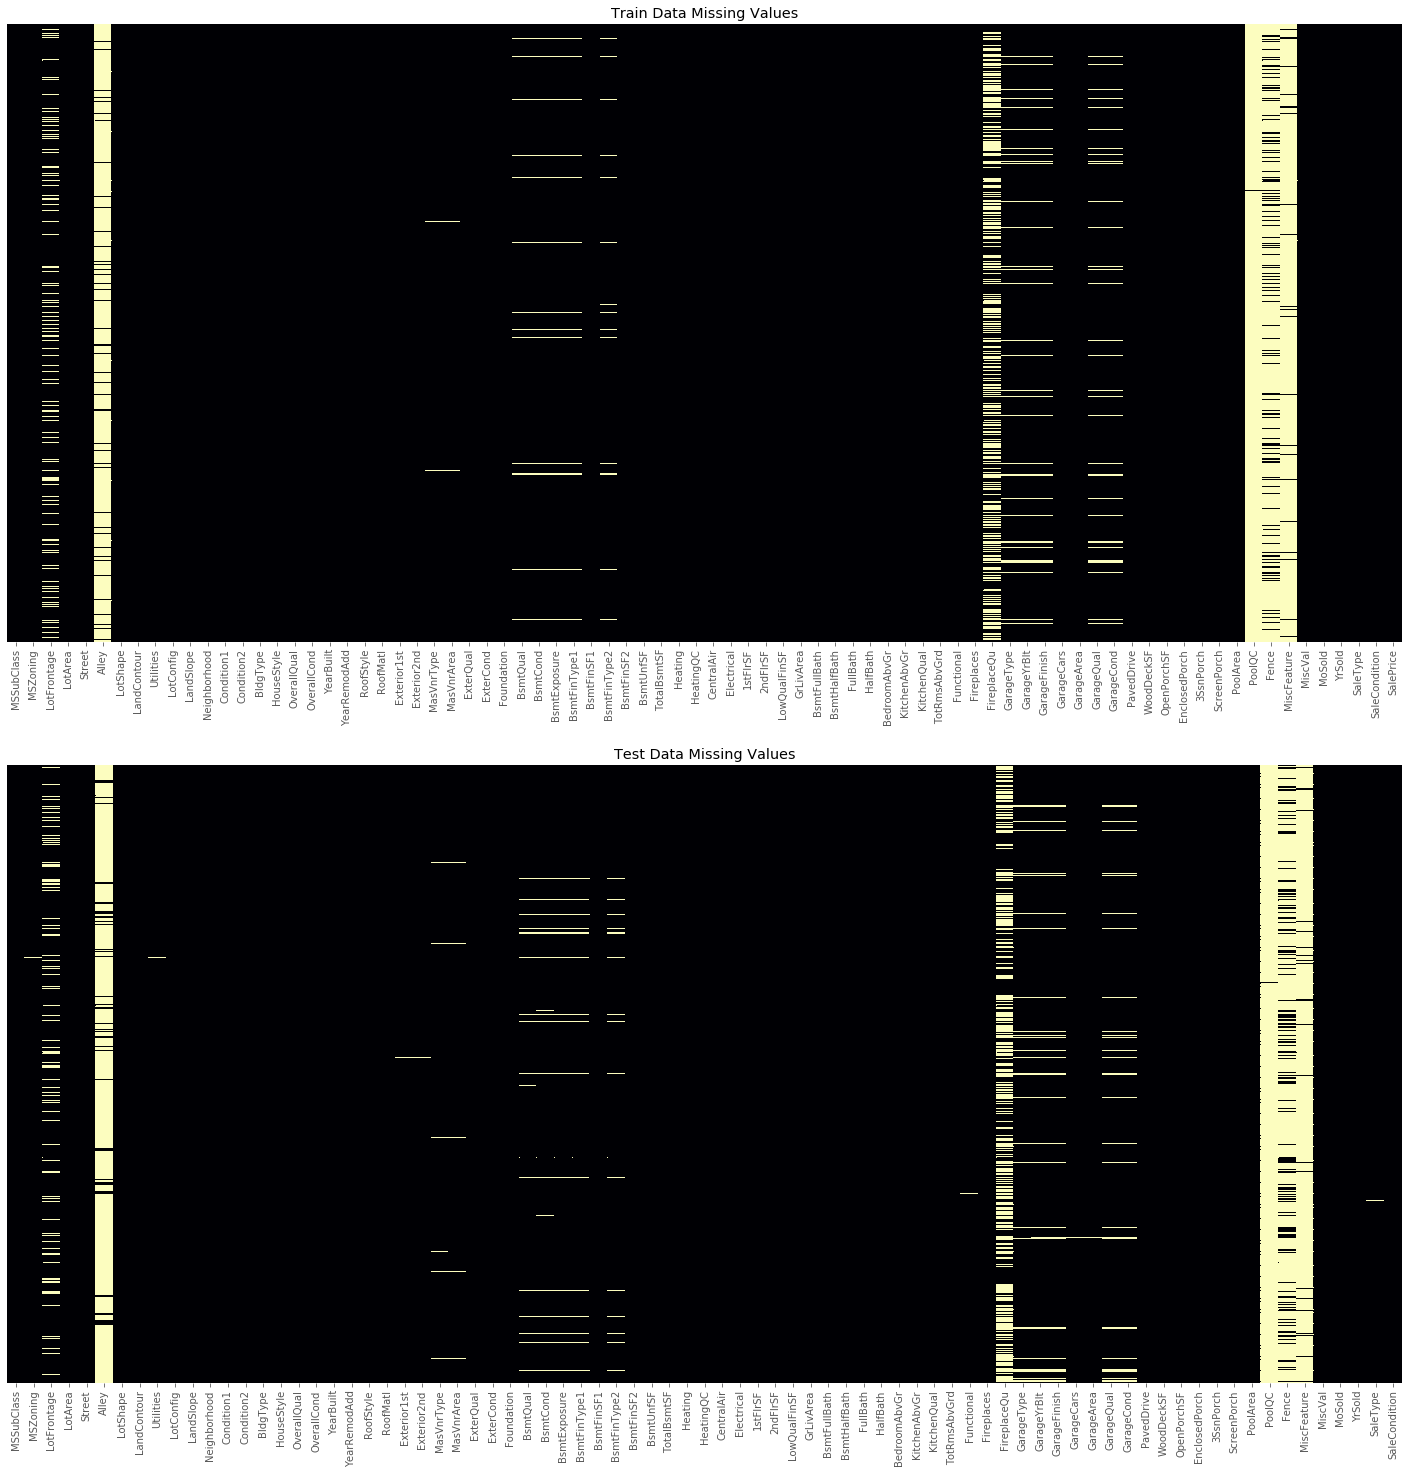

In [262]:
# Visualising missing data

fig, ax = plt.subplots(nrows=2, figsize=(25, 25))
half = len(v_train)/2
sns.heatmap(v_train.loc[:half].isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax[0])
sns.heatmap(v_test.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax[1])

ax[0].set_title('Train Data Missing Values')
ax[1].set_title('Test Data Missing Values')

plt.xticks(rotation=90)
plt.show()

In [297]:
# Make Table to see NA values and class in total data set

def get_na_and_d_type(column):
    num_na = column.isnull().sum()
    dtype = column.dtype
    sample =column.sample(n=4).reset_index( drop=True)
    data_1= pd.Series({'number of missing data': num_na,'data type': dtype})
    return pd.concat([data_1, sample, ], )

v_merged_na = v_merged.apply(get_na_and_d_type, axis=0)
# v_merged_na = v_merged_na.loc[v_merged_na['number of missing data'] != 0]
# display(v_merged_na) 
display(v_merged_na.T) 

v_merged_na_sorted = v_merged_na.sort_values(by='number of missing data', axis=1, ascending=False)
display(v_merged_na_sorted) 

,number of missing data,data type,0,1,2,3
MSSubClass,0,int64,20,45,20,20
MSZoning,0,object,RM,RL,RL,RL
LotFrontage,0,float64,88,60,60,52
LotArea,0,int64,6000,13175,11367,10206
Street,0,object,Pave,Pave,Pave,Pave
Alley,0,object,NA,NA,NA,NA
LotShape,0,object,Reg,IR1,IR1,Reg
LandContour,0,object,Lvl,Lvl,Lvl,Bnk
Utilities,0,object,AllPub,AllPub,AllPub,AllPub
LotConfig,0,object,Inside,Inside,CulDSac,Corner


,PoolQC,MiscFeature,Fence,SalePrice,FireplaceQu,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,BsmtFinType1,Functional,BsmtFullBath,BsmtHalfBath,TotalBsmtSF,BsmtUnfSF,GarageArea,SaleType,BsmtFinSF2,BsmtFinSF1,Electrical,KitchenQual,GarageCars,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,MiscVal,PoolArea,Fireplaces,SaleCondition,GrLivArea,YrSold,MoSold,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,TotRmsAbvGrd,MSSubClass,LowQualFinSF,LotConfig,HouseStyle,BldgType,Condition2,Condition1,Neighborhood,LandSlope,Utilities,2ndFlrSF,LandContour,LotShape,Alley,Street,LotArea,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,Heating,HeatingQC,MSZoning,1stFlrSF,CentralAir
number of missing data,2909,2814,2348,1459,1420,159,159,159,159,157,82,82,81,80,79,2,2,2,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
data type,object,object,object,float64,object,object,object,object,float64,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,object,float64,float64,object,object,float64,int64,int64,int64,int64,int64,int64,int64,object,int64,int64,int64,object,int64,int64,int64,int64,int64,int64,int64,int64,object,object,object,object,object,object,object,object,int64,object,object,object,object,int64,float64,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,int64,object
0,NaN,NaN,NaN,NaN,NaN,RFn,TA,TA,2003,Attchd,TA,No,TA,Unf,Unf,Typ,0,0,1040,254,576,WD,0,846,SBrkr,TA,1,1,3,0,2,0,0,1,Normal,1609,2010,5,Y,0,0,0,0,0,7,20,0,Inside,1Story,1Fam,Norm,Norm,CollgCr,Gtl,AllPub,732,Lvl,Reg,NA,Pave,6000,88,7,5,1977,2000,Hip,CompShg,VinylSd,BrkFace,None,0,TA,TA,CBlock,GasA,Ex,RM,1072,Y
1,NaN,NaN,NaN,NaN,NaN,Fin,TA,TA,1968,Detchd,TA,No,Gd,Unf,Unf,Typ,0,0,966,64,200,WD,0,986,SBrkr,Gd,3,1,2,1,2,0,0,0,Partial,1872,2008,6,Y,143,16,0,0,0,7,45,0,Inside,1.5Fin,1Fam,Norm,Norm,CollgCr,Gtl,AllPub,547,Lvl,IR1,NA,Pave,13175,60,9,8,1974,2008,Gable,CompShg,MetalSd,Plywood,None,0,Gd,Gd,PConc,GasA,Gd,RL,1040,Y
2,NaN,NaN,NaN,NaN,NaN,Unf,TA,TA,1980,Attchd,TA,Mn,NaN,Unf,ALQ,Typ,1,0,1673,520,252,WD,0,0,SBrkr,TA,2,1,2,0,2,0,0,0,Normal,1536,2009,6,Y,0,45,0,0,0,6,20,0,CulDSac,2Story,1Fam,Norm,Norm,IDOTRR,Gtl,AllPub,0,Lvl,IR1,NA,Pave,11367,60,4,6,2001,1959,Gable,CompShg,HdBoard,MetalSd,None,0,TA,TA,BrkTil,GasA,Gd,RL,1217,Y
3,NaN,NaN,MnPrv,314813,TA,Unf,TA,TA,1993,Detchd,TA,No,Gd,Unf,Unf,Typ,0,0,712,1406,180,WD,0,416,SBrkr,TA,0,1,3,0,2,0,0,2,Partial,2640,2008,5,P,0,0,202,0,0,7,20,0,Corner,2Story,1Fam,Norm,Norm,NAmes,Gtl,AllPub,0,Bnk,Reg,NA,Pave,10206,52,8,9,2003,1978,Gable,CompShg,HdBoard,VinylSd,None,351,TA,TA,CBlock,GasA,Ex,RL,672,Y


**Observations:**
- PoolQC,MiscFeature,Alley, Fence have the most missing values
- NaN values may represent None as a categorical attritubes

In [264]:
v_merged_na_top = v_merged.apply(lambda column: column.isnull().sum(), axis=0).sort_values(ascending=False).head(30)
v_merged_na_top

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
GarageCars         1
BsmtFinSF2         1
Exterior2nd        1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
dtype: int64

## 5.1 Dealing with Missing data

Inputing missing values



## 5.1.1 MSZoning

There is four missing data. The values are categorical

```
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
```       
       

In [265]:
v_merged.loc[v_merged.MSZoning.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,NaN
756,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN
790,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN
1444,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN


RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

MSZoning
C (all)     74700.0
FV         205950.0
RH         136500.0
RL         174000.0
RM         120500.0
Name: SalePrice, dtype: float64

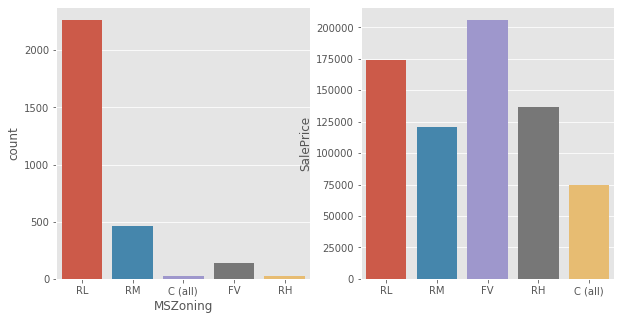

In [266]:
def plot_dist_and_saleprice(attr, **kwargs):
    f, (ax1, ax2,) = plt.subplots(1, 2, figsize=(10, 5), **kwargs)
    sns.countplot(v_merged[attr], ax=ax1)
    value_counts = v_merged[attr].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts, ax=ax2)
    sale_price = v_merged.groupby(attr).SalePrice.median()
    sale_price = sale_price[value_counts.index]
    sns.barplot(x=sale_price.index, y=sale_price, ax=ax2)

plot_dist_and_saleprice('MSZoning')    


display(v_merged['MSZoning'].value_counts())
MSZoning_mode = v_merged['MSZoning'].mode()

sale_price = v_merged.groupby('MSZoning').SalePrice.median()
display(sale_price)


We assign the mode of the attributes to the NA values

In [267]:

v_merged['MSZoning']  = v_merged['MSZoning'].replace([None],MSZoning_mode[0] )


## 5.1.2 LotFrontage

486 NAs. Linear feet of street connected to property

We assign the NA to zero.



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


(array([0. , 0.5, 1. ]), <a list of 0 Text xticklabel objects>)

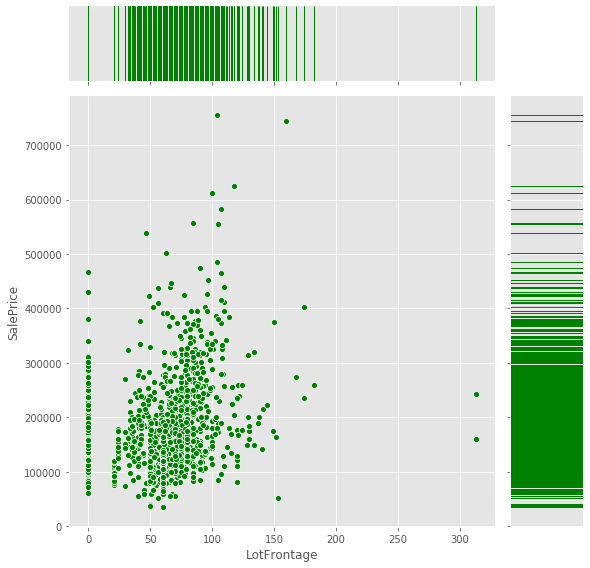

In [268]:
# f,ax1 = plt.subplots(figsize =(20,10))
v_merged['LotFrontage'] = v_merged['LotFrontage'].fillna(0)
display(v_merged.loc[v_merged['LotFrontage'].isnull()])
data = v_merged[['LotFrontage', 'SalePrice']]

grid = sns.JointGrid(x='LotFrontage',y='SalePrice',data=data, height =8)
grid.plot_joint(sns.scatterplot, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")
plt.xticks(rotation=90)

There is not a strong relationship with the SalePrice

In [269]:
v_merged[['LotFrontage', 'SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.209624
SalePrice,0.209624,1.000000


We assign the NA to zero

## 5.1.3 Alley

    Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       

We assign 'NA' to None

Alley
Grvl    119500.0
NA      165000.0
Pave    172500.0
Name: SalePrice, dtype: float64

NA      2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

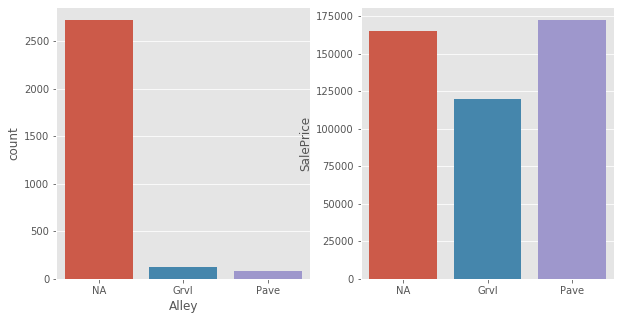

In [270]:
v_merged['Alley'] = v_merged['Alley'].fillna('NA')
display(v_merged.groupby('Alley').SalePrice.median())
display(v_merged.Alley.value_counts())
plot_dist_and_saleprice('Alley' )

## 5.1.3 Utilities

    Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only
       
2NAs, Most of the data has 'All Pub', specify it to 'All Pub'

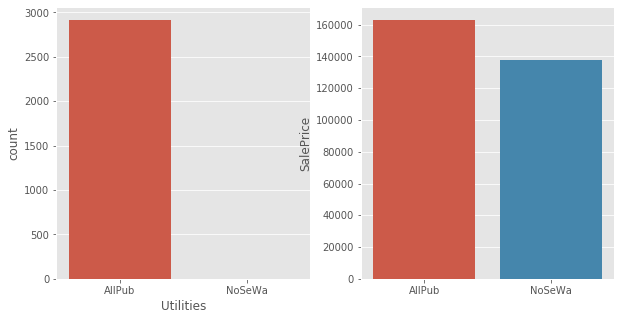

In [271]:
plot_dist_and_saleprice('Utilities' )

In [272]:
v_merged['Utilities'] = v_merged['Utilities'].fillna('AllPub')

# 5.1.5 Exterior Variables
Exterior1st and Exterior1st have the same range of categorical labels.

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles


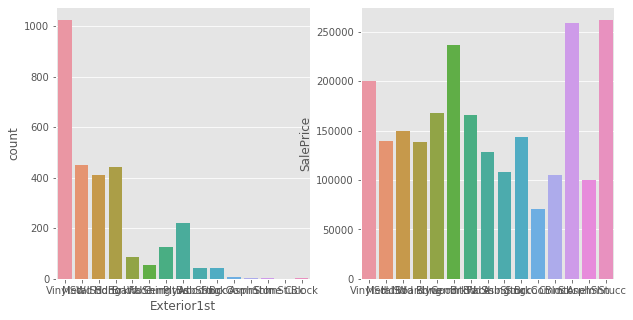

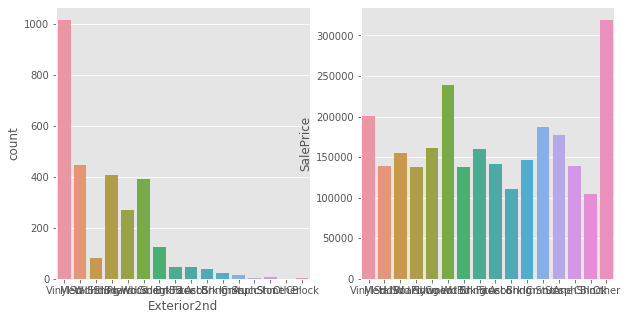

In [273]:
plot_dist_and_saleprice('Exterior1st' )
plot_dist_and_saleprice('Exterior2nd' )



Assign the mode to the missing values of 


In [274]:
mode_value = pd.concat([v_merged['Exterior1st'], v_merged['Exterior2nd']]).mode()
display(mode_value)

## Fill NA with mode value
v_merged['Exterior1st'] = v_merged['Exterior1st'].fillna(mode_value[0])
v_merged['Exterior2nd'] = v_merged['Exterior2nd'].fillna(mode_value[0])

0    VinylSd
dtype: object

# 5.1.6 Masonry veneer
MasVnrType should be 

 
MasVnrType has 24 NAs, MasVnrArea has 23 NAs. The two values should coexist to describe both the Masonry veneer type and area.

       MasVnrType: Masonry veneer type
   
       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
       
       
       MasVnrArea: Masonry veneer area in square feet
       

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1150,20,RL,124.0,27697,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,4,3,1961,1961,Shed,CompShg,Plywood,Plywood,NaN,198.0,TA,TA,CBlock,TA,TA,No,BLQ,811.0,Unf,0.0,585.0,1396.0,GasA,TA,N,SBrkr,1608,0,0,1608,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1961.0,Unf,1.0,444.0,TA,Fa,Y,152,38,0,0,0,0,NaN,NaN,NaN,0,11,2007,COD,Abnorml,NaN


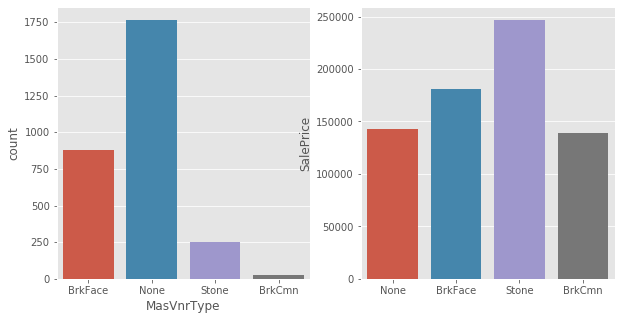

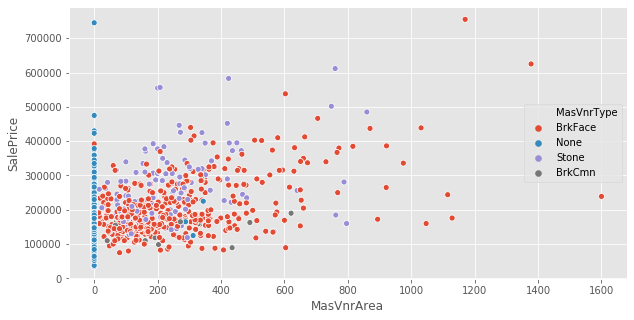

In [290]:


plot_dist_and_saleprice('MasVnrType' )
masVnrType_data  = v_merged[['MasVnrType', 'MasVnrArea','SalePrice']]

f, (ax) = plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(x="MasVnrArea", y="SalePrice", hue="MasVnrType",
                     data=masVnrType_data, ax=ax)


In [294]:
abnormal_data = v_merged.loc[v_merged.MasVnrType.isnull() & v_merged.MasVnrArea.notnull() ]


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458],
           dtype='int64', length=2919)

The abnormal data has MasVnrArea = 198.0 and MasVnrType in Nan. We shall asign MasVnrType as the mode of the dataset except None, i.e. BrkFace.

In [296]:
## TODO: modify the abnormal_data

## Fill NA with 'None'
v_merged['MasVnrType'].fillna('None', inplace=True)
v_merged['MasVnrArea'].fillna(0, inplace=True)



# Label Encoding

## 5.1.1 MSSubClass

Categorical class is labeled as Number

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       



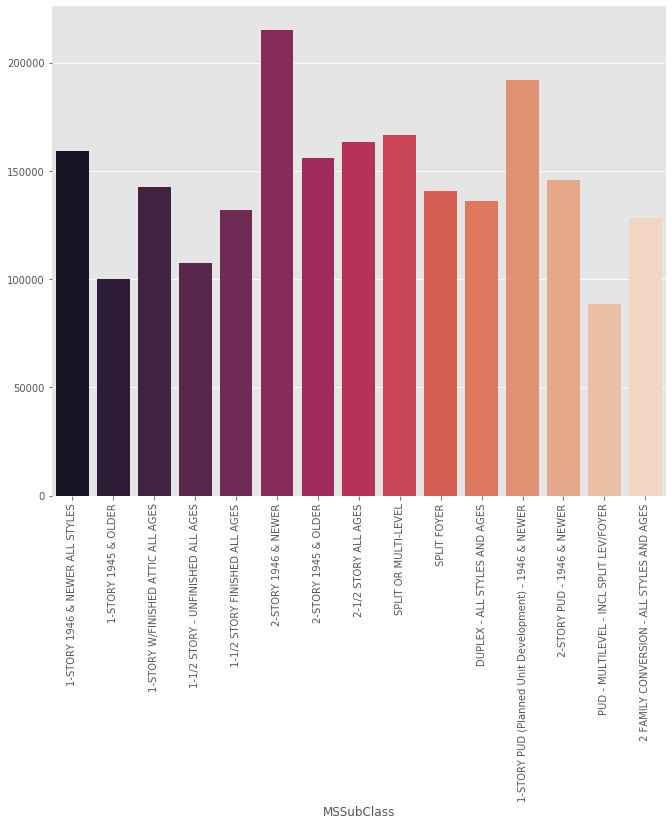

In [277]:

index_name= {
    20: '1-STORY 1946 & NEWER ALL STYLES',
    30: '1-STORY 1945 & OLDER',
    40: '1-STORY W/FINISHED ATTIC ALL AGES',
    45:'1-1/2 STORY - UNFINISHED ALL AGES',
    50:'1-1/2 STORY FINISHED ALL AGES',
    60:'2-STORY 1946 & NEWER',
    70:'2-STORY 1945 & OLDER',
    75:'2-1/2 STORY ALL AGES',
    80:'SPLIT OR MULTI-LEVEL',
    85:'SPLIT FOYER',
    90:'DUPLEX - ALL STYLES AND AGES',
    120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150:'1-1/2 STORY PUD - ALL AGES',
    160:'2-STORY PUD - 1946 & NEWER',
    180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
   190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
}

f, ax = plt.subplots(figsize=(11, 9))

# Get Median and Count Data
x = v_merged['MSSubClass']
data = v_train.groupby('MSSubClass').SalePrice.agg(['median', 'count'])
# Rename Index for better information
data.rename(index=index_name, inplace=True)

sns.barplot(x=data.index, y=data['median'].values, palette="rocket", ax=ax)
plt.xticks(rotation=90)

sns.despine(left=True, bottom=True)

## LotArea
Check the relationship with LotFrontage,despit the similarity in name, they do not have much relationship.

In [278]:
v_merged[['LotArea', 'LotFrontage']].corr()

,LotArea,LotFrontage
LotArea,1.000000,0.135246
LotFrontage,0.135246,1.000000
